In [ ]:
import pandas as pd
# Upload csv
df = pd.read_csv('https://drive.google.com/uc?id=1q812s1gYbsm51wMaBsMf6X8gQseDaEKu')
#https://drive.google.com/file/d/18se2kT5KanoQAhgO5Oj9d5UbB1jBJ8nX/view?usp=drive_link

In [ ]:
df.head()

,name,year,home,genre,views,votes,excerpt,director,actors,KP_rating,KP_votes,name_eng
0,Пять ночей у Фредди (2023),2023,США,"Фильмы, Ужасы, Фильмы 2023",214702,904,Фильм «Пять ночей у Фредди» основанный на изве...,Эмма Тамми,"Джош Хатчерсон, Элизабет Лэил, Мэттью Лиллард,...",7.1,294731,Five nights at Freddy (2023)
1,Крэйвен-охотник (2023),2023,США,"Фильмы, Боевики, Приключения, Фантастика, Филь...",609834,666,Фильм «Крэйвен-охотник» про русского иммигрант...,Джей Си Чендор,"Аарон Тейлор-Джонсон, Рассел Кроу, Ариана ДеБо...",5.5,23497,Craven-hunter (2023)
2,Великий уравнитель (2014),2014,США,"Фильмы, Боевики, Криминал, Триллеры, Фильмы 2014",457828,554,«Великий уравнитель» фильм об одном спецназовц...,Антуан Фукуа,"Хейли Беннетт, Билл Пуллман, Хлоя Грейс Морец,...",6.4,40699,Great Egor (2014)
3,Трансформеры: Восхождение Звероботов (2023),2023,США,"Фильмы, Боевики, Приключения, Фантастика",712603,1650,"В фантастическом фильме, боевике «Трансформеры...",Стивен Кейпл мл.,"Пит Дэвидсон, Мишель Йео, Рон Перлман, Энтони ...",7.7,11061,Transformers: the ascent of St. John's wort (2...
4,Эскортницы (2021),2021,Польша,"Драмы, Фильмы",583557,774,"Эми — амбициозная девушка, всегда мечтавшая о ...",Мария Садовска,"Полина Галазка, Катажина Фигура, Катажина Савч...",5.1,5026,Escortnitsa (2021)


In [ ]:
print(df.dtypes)

name          object
year           int64
home          object
genre         object
views          int64
votes          int64
excerpt       object
director      object
actors        object
KP_rating    float64
KP_votes       int64
name_eng      object
dtype: object


In [ ]:
# Count missing values
df.isna().sum()

name          0
year          0
home          0
genre        40
views         0
votes         0
excerpt       0
director      0
actors        0
KP_rating     0
KP_votes      0
name_eng      0
dtype: int64

In [ ]:
df.size

276744

In [ ]:
len(df)

23062

#Choosing the features for the recommendation system

**Movie Description Based Recommender** which computes similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score

In [ ]:
df['excerpt'].head(10)

0    Фильм «Пять ночей у Фредди» основанный на изве...
1    Фильм «Крэйвен-охотник» про русского иммигрант...
2    «Великий уравнитель» фильм об одном спецназовц...
3    В фантастическом фильме, боевике «Трансформеры...
4    Эми — амбициозная девушка, всегда мечтавшая о ...
5    Янн всегда любил автомобили, однако отец не им...
6    Сигрид несколько раз состояла в отношениях, од...
7    Джо является успешным бизнесменом, в последнее...
8    Роберт уже несколько лет пытается жить обычной...
9    Миа жила обычной жизнью, у неё был любящий муж...
Name: excerpt, dtype: object

#Cleaning the text data

In [ ]:
# The path to stop words text file
stop_words_ru = '/content/stop.txt'


with open(stop_words_ru, 'r') as file:
    stop_words_text = file.read().splitlines()

In [ ]:
stop_words_text

['а',
 'абсолютно',
 'авторизоваться',
 'активный',
 'алло',
 'алтухов',
 'атмосфера',
 'ах',
 'б',
 'беду',
 'без',
 'безусловно',
 'белый',
 'бесспорно',
 'бизнеса',
 'благодарение',
 'благодарить',
 'ближе',
 'близ',
 'близко',
 'блин',
 'бог',
 'богом',
 'богу',
 'более',
 'больше',
 'большинство',
 'большой',
 'большую',
 'браво',
 'будем',
 'будет',
 'будете',
 'будешь',
 'будто',
 'буду',
 'будут',
 'будучи',
 'будь',
 'будьте',
 'бы',
 'бывает',
 'бывало',
 'бывший',
 'был',
 'была',
 'были',
 'было',
 'бытие',
 'бытует',
 'быть',
 'в',
 'в общем',
 'важная',
 'важно',
 'важное',
 'важные',
 'важный',
 'вам',
 'вами',
 'вас',
 'ваш',
 'ваша',
 'ваше',
 'вашего',
 'вашему',
 'ваши',
 'вверх',
 'ввиду',
 'вдали',
 'вдобавок',
 'вдоль',
 'вдруг',
 'ведь',
 'везде',
 'век',
 'веке',
 'верите',
 'верить',
 'веришь',
 'вернее',
 'верно',
 'вернуться',
 'вероятнее',
 'вероятно',
 'вероятности',
 'вес',
 'вестимо',
 'весь',
 'весьма',
 'вечер',
 'вещи',
 'вещь',
 'взгляд',
 'взыскатель

In [ ]:
df.excerpt


0        Фильм «Пять ночей у Фредди» основанный на изве...
1        Фильм «Крэйвен-охотник» про русского иммигрант...
2        «Великий уравнитель» фильм об одном спецназовц...
3        В фантастическом фильме, боевике «Трансформеры...
4        Эми — амбициозная девушка, всегда мечтавшая о ...
                               ...                        
23057    «Тяжелый металл» называют и совестью рок-н-рол...
23058    Молодой врач из Нью-Йорка, по имени Зои Харт, ...
23059    Доктор Уильям Раш не похож на обычного терапев...
23060    Сериал рассказывает о гей-паре, мечтающей имет...
23061    Марта Кастелло - успешный адвокат, претендующи...
Name: excerpt, Length: 23062, dtype: object

Let's delete the punctuation from df

In [ ]:
import string

In [ ]:
df['excerpt'] = df['excerpt'].str.replace(r'[^\w\s]+', '')

<ipython-input-11-a45efeea3ab0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['excerpt'] = df['excerpt'].str.replace(r'[^\w\s]+', '')


In [ ]:
df.excerpt

0        Фильм Пять ночей у Фредди основанный на извест...
1        Фильм Крэйвенохотник про русского иммигранта п...
2        Великий уравнитель фильм об одном спецназовце ...
3        В фантастическом фильме боевике Трансформеры В...
4        Эми  амбициозная девушка всегда мечтавшая о ро...
                               ...                        
23057    Тяжелый металл называют и совестью рокнролла и...
23058    Молодой врач из НьюЙорка по имени Зои Харт отп...
23059    Доктор Уильям Раш не похож на обычного терапев...
23060    Сериал рассказывает о гейпаре мечтающей иметь ...
23061    Марта Кастелло  успешный адвокат претендующий ...
Name: excerpt, Length: 23062, dtype: object

In [ ]:
import re
#remove stop words and lowcase
def remove_stopwords(text):
    # Convert to lowercase, remove digits, and split into tokens
    tokens = re.sub(r'\d', '', text.lower()).split()
    filtered_tokens = [word for word in tokens if word not in stop_words_text]
    return ' '.join(filtered_tokens)

In [ ]:
df['excerpt'] = df['excerpt'].apply(remove_stopwords)

In [ ]:
df['excerpt']

0        фильм ночей фредди основанный известной видеои...
1        фильм крэйвенохотник русского иммигранта имени...
2        великий уравнитель фильм спецназовце роберте м...
3        фантастическом фильме боевике трансформеры вос...
4        эми амбициозная девушка мечтавшая роскошной по...
                               ...                        
23057    тяжелый металл называют совестью рокнролла мог...
23058    молодой врач ньюйорка имени зои харт отправляе...
23059    доктор уильям раш похож обычного терапевта раб...
23060    сериал рассказывает гейпаре мечтающей детей де...
23061    марта кастелло успешный адвокат претендующий ш...
Name: excerpt, Length: 23062, dtype: object

In [ ]:
df


,name,year,home,genre,views,votes,excerpt,director,actors,KP_rating,KP_votes,name_eng
0,Пять ночей у Фредди (2023),2023,США,"Фильмы, Ужасы, Фильмы 2023",214702,904,фильм ночей фредди основанный известной видеои...,Эмма Тамми,"Джош Хатчерсон, Элизабет Лэил, Мэттью Лиллард,...",7.1,294731,Five nights at Freddy (2023)
1,Крэйвен-охотник (2023),2023,США,"Фильмы, Боевики, Приключения, Фантастика, Филь...",609834,666,фильм крэйвенохотник русского иммигранта имени...,Джей Си Чендор,"Аарон Тейлор-Джонсон, Рассел Кроу, Ариана ДеБо...",5.5,23497,Craven-hunter (2023)
2,Великий уравнитель (2014),2014,США,"Фильмы, Боевики, Криминал, Триллеры, Фильмы 2014",457828,554,великий уравнитель фильм спецназовце роберте м...,Антуан Фукуа,"Хейли Беннетт, Билл Пуллман, Хлоя Грейс Морец,...",6.4,40699,Great Egor (2014)
3,Трансформеры: Восхождение Звероботов (2023),2023,США,"Фильмы, Боевики, Приключения, Фантастика",712603,1650,фантастическом фильме боевике трансформеры вос...,Стивен Кейпл мл.,"Пит Дэвидсон, Мишель Йео, Рон Перлман, Энтони ...",7.7,11061,Transformers: the ascent of St. John's wort (2...
4,Эскортницы (2021),2021,Польша,"Драмы, Фильмы",583557,774,эми амбициозная девушка мечтавшая роскошной по...,Мария Садовска,"Полина Галазка, Катажина Фигура, Катажина Савч...",5.1,5026,Escortnitsa (2021)
...,...,...,...,...,...,...,...,...,...,...,...,...
23057,"Больше, чем жизнь: История хэви-метал (2006)",2006,Великобритания,"Британские, Фильмы",55,3,тяжелый металл называют совестью рокнролла мог...,Дик Карратерс,"Ричи Блэкмор, Грэм Боннет, Гизер Батлер, Дэвид...",0.0,0,More than life: History of Havi-Metal (2006)
23058,Зои Харт из южного штата / Сердце Дикси (2011),2011,США,"Драмы, Комедии, Мелодрамы",321,3,молодой врач ньюйорка имени зои харт отправляе...,"Дэвид Пэймер, Тим Мэтисон, Джеймс Хейман","Рэйчел Билсон, Джейми Кинг, Кресс Уильямс, Уил...",0.0,0,Zoe Hart from the Southern State / Heart Dixie...
23059,Раш (2014),2014,Канада,"Драмы, Боевики",1147,10,доктор уильям раш похож обычного терапевта раб...,"Деран Сарафян, Дэвид Баррет, Пол А. Эдвардс","Том Эллис, Лоренц Тейт, Сара Хабель, Рик Гонса...",0.0,0,Rush (2014)
23060,Новая норма (2012),2012,США,"Комедии, Мелодрамы",68,2,сериал рассказывает гейпаре мечтающей детей де...,"Элоди Кин, Макс Уинклер, Райан Мёрфи","Джастин Барта, Эндрю Рэннеллс, Джорджия Кинг, ...",0.0,0,New norm (2012)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.to_csv('/content/drive/My Drive/movies_excerpt.csv', index=False)

#Preparing the matrix of features

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer


#Define a TF-IDF Vectorizer

tfidf = TfidfVectorizer(analyzer='word', # Use word-level analysis
                        ngram_range=(1, 2), #Consider unigrams and bigrams
                        min_df=0) # Ignore terms that appear
                        #in less than 0 documents (absolute counts)

In [ ]:
#Replace NaN with an empty string
df['excerpt'] = df['excerpt'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['excerpt'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(23062, 604865)

The matrix include 604 865 unique tokens to describe the 23 062 movies dataset

There are several options to compute a similarity score; such as the euclidean, the Pearson and the cosine similarity scores.

Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

The cosine similarity score will be used to calculate a numeric quantity that denotes the similarity between two movies. The score is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

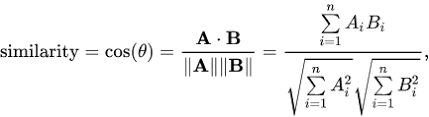

In [ ]:
tfidf

TfidfVectorizer(min_df=0, ngram_range=(1, 2))

In [ ]:
# Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.01075308, 0.00212511, ..., 0.00472381, 0.00881093,
        0.        ],
       [0.01075308, 1.        , 0.00232073, ..., 0.        , 0.        ,
        0.        ],
       [0.00212511, 0.00232073, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00472381, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00881093, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

#Preparing the function for getting a list of recommended movies

Definition of recommendation function

*  Get the index of the movie given its title.
*  Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
*   Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
*  Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
*   Return the titles corresponding to the indices of the top elements.





In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['name'])

In [ ]:
indices

name
Пять ночей у Фредди (2023)                            0
Крэйвен-охотник (2023)                                1
Великий уравнитель (2014)                             2
Трансформеры: Восхождение Звероботов (2023)           3
Эскортницы (2021)                                     4
                                                  ...  
Больше, чем жизнь: История хэви-метал (2006)      23057
Зои Харт из южного штата / Сердце Дикси (2011)    23058
Раш (2014)                                        23059
Новая норма (2012)                                23060
Шелк (2011)                                       23061
Length: 23062, dtype: int64

In [ ]:
df['name']

0                            Пять ночей у Фредди (2023)
1                                Крэйвен-охотник (2023)
2                             Великий уравнитель (2014)
3           Трансформеры: Восхождение Звероботов (2023)
4                                     Эскортницы (2021)
                              ...                      
23057      Больше, чем жизнь: История хэви-метал (2006)
23058    Зои Харт из южного штата / Сердце Дикси (2011)
23059                                        Раш (2014)
23060                                Новая норма (2012)
23061                                       Шелк (2011)
Name: name, Length: 23062, dtype: object

In [ ]:
# Function that takes in movie title as input and outputs most similar movies with their indices and titles
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 15 most similar movies
    sim_scores = sim_scores[1:16]

    # Get the movie indices and similarity scores
    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    #return df['name'].iloc[movie_indices]
    # Create a list of (index, title, similarity score) tuples for the top 15 most similar movies
    similar_movies = [(idx, df['name'].iloc[idx], sim_score) for idx, sim_score in zip(movie_indices, similarity_scores)]

    return similar_movies

In [ ]:
get_recommendations('Пять ночей у Фредди (2023)')

[(19574, 'Школьница против зомби (2011)', 0.06898869548511372),
 (11147, 'Неназванный (2011)', 0.0468489723272001),
 (6574, 'Фредди (2022)', 0.04529886595372494),
 (632, 'Лёгкое знакомство (2023)', 0.0416877713734937),
 (18830, 'Костюмер (2015)', 0.04142629772765775),
 (975, 'Шрапнель (2023)', 0.041055521957739725),
 (14801, 'Быть Флинном (2011)', 0.038800235608543),
 (15551, 'Чувство вины (2020)', 0.03869896436342256),
 (1543, 'Богемская Рапсодия (2018)', 0.0381519754279332),
 (13060, 'Девушка на фотографиях (2015)', 0.03517607229313743),
 (6811, 'Охотница: Руна мёртвых (2019)', 0.03475106084950108),
 (3544, 'Убийцы монстров (2020)', 0.03462496793833352),
 (9610, 'Летняя школа (1987)', 0.03458720486409044),
 (5779, 'Час пик (2016)', 0.03453690494372532),
 (7168, 'Моя маленькая влюбленность (2021)', 0.03436480082365846)]

In [ ]:
def improved_recommendations(name):
    # Check if the movie title exists in the dataset
    if name not in indices:
        return f"Movie '{name}' not found in the dataset."

    # Get the index and similarity scores
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]

    # Get detailed information about the recommended movies
    recommended_movies = df.iloc[movie_indices][['name_eng', 'excerpt', 'genre', 'views', 'votes', 'KP_rating']]
    #recommended_movies = df.iloc[movie_indices][['name_eng', 'excerpt', 'views', 'votes']]
    # Sort the recommended movies by KP_rating in descending order
    recommended_movies = recommended_movies

    # Extract the similarity scores and include them in the output
    similarity_scores = [sim_score[1] for sim_score in sim_scores]
    #recommended_movies['Similarity_Score'] = similarity_scores
    recommended_movies.loc[:, 'Similarity_Score'] = similarity_scores

    return recommended_movies

In [ ]:
# Set pandas display options to show the full content of 'excerpt'
pd.set_option('display.max_colwidth', None)

In [ ]:
improved_recommendations('Матрица (1999)')

,name_eng,excerpt,genre,views,votes,KP_rating,Similarity_Score
14140,When she comes (2019),офисный клерк максим свидетелем автокатастрофы пострадавшая девушка переживает клиническую смерть длится минуты возвращения максима кардинально меняется мечты воплощаются реальность помощью таинственного дара девушки заведут максима желания,"Триллеры, Фантастика, Трейлеры, Фильмы",93,2,4.2,0.087459
475,Transformers 3: The Dark Side of the Moon (2011),действия фантастической киноленты трансформеры темная луны происходят спустя эпического сражения предыдущей части сэм неоднократно спасал человечество друзьями автоботами удостоился награды рук президента прошлом парнишка обычный офисный клерк отдыхает,"Фильмы, Боевики, Приключения, Фантастика",53675,26,6.8,0.081163
8298,At night (1985),эда оркина скучна уныла мучает бессонница нудная доставляет никакого удовольствия постоянно обманывает ночью меняется встреча аэропорту лосанджелеса красавицей дайаной буквально сваливается капот автомобиля роковой загадочной блондинкой эд желая попадает,"Драмы, Комедии, Мелодрамы, Боевики, Криминал, Триллеры, Трейлеры, Фильмы",92,2,6.4,0.067036
4928,Number one (2020),центре сюжета фильма номер легендарный похититель предметов искусства узких кругах феликс мужчина решает провернуть рисковое выкрасть знаменитую картину марка ротко названием галереи бывшей супруги волк заручается поддержкой молодого авантюриста артема предстоит провернуть,"Фильмы, Фильмы 2020, Комедии, Триллеры",5748,38,5.3,0.059316
4958,Immodest observer (season 1),миранда ненасытная вуайеристка гениальный хакер наблюдает жизнью клео элитной проститутки дома клео стучится миранды просит присмотреть собакой отъезде главной героини меняется встречает мужчину мечты,"Драмы, Детективы, Триллеры, Трейлеры",1296,9,5.9,0.056757


#Testing the recommendation system

In [ ]:
# Sample 5000 movie titles from your DataFrame
movie_titles_list = df['name'].sample(n=5000, random_state=42).tolist()


In [ ]:
# Create empty lists to store the recommendations and related information
recommended_movies_list = []
views_list = []
votes_list = []
similarity_scores_list = []
mean_views_list = []
mean_votes_list = []
mean_similarity_scores_list = []

# Loop through each movie title
for movie_title in movie_titles_list:
    # Call the recommendation function for each movie title
    recommendations = improved_recommendations(movie_title)

    # Extract information from the recommendations
    recommended_movies_list.append(recommendations['name_eng'].tolist())
    views_list.append(recommendations['views'].tolist())
    votes_list.append(recommendations['votes'].tolist())

    # Calculate mean of views and votes for the recommended movies
    mean_views = recommendations['views'].mean()
    mean_votes = recommendations['votes'].mean()
    mean_views_list.append(mean_views)
    mean_votes_list.append(mean_votes)

    # Extract similarity scores from the recommendations
    similarity_scores = recommendations['Similarity_Score'].tolist()
    similarity_scores_list.append(similarity_scores)

    # Calculate mean similarity score
    mean_similarity_score = sum(similarity_scores) / len(similarity_scores)
    mean_similarity_scores_list.append(mean_similarity_score)

# Create a new DataFrame with the results
recommendations_df = pd.DataFrame({
    'Original_Movie_Title': movie_titles_list,
    'Recommended_Movies': recommended_movies_list,
    'Recommended_Views': views_list,
    'Recommended_Votes': votes_list,
    'Mean_Views': mean_views_list,
    'Mean_Votes': mean_votes_list,
    'Similarity_Scores': similarity_scores_list,
    'Mean_Similarity_Score': mean_similarity_scores_list
})

<ipython-input-40-0056843b4016>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies.loc[:, 'Similarity_Score'] = similarity_scores
<ipython-input-40-0056843b4016>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies.loc[:, 'Similarity_Score'] = similarity_scores
<ipython-input-40-0056843b4016>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
recommendations_df

,Original_Movie_Title,Recommended_Movies,Recommended_Views,Recommended_Votes,Mean_Views,Mean_Votes,Similarity_Scores,Mean_Similarity_Score
0,На месте принцессы (2018),"[Happy Bay (2020), Muhamores (2016), Miracle Maldonado (TV) (2003), Fresno (2015), Predperson (2020)]","[1588, 101, 46, 780, 4826]","[3, 2, 2, 4, 26]",1468.2,7.4,"[0.09911206710766066, 0.08263744185082475, 0.073288637964292, 0.0662347993690934, 0.058445705778482626]",0.075944
1,"Папа, перестань меня позорить (2021)","[To you or to me? (2023), She will never know / Sonbe, do not paint her lips (2021), Stories from steam rooms: in cinema (2019), Love and other circumstances (2009), The kingdom of the full moon (2012)]","[68331, 95, 60, 102, 15038]","[81, 2, 2, 2, 9]",16725.2,19.2,"[0.09358974175755172, 0.09167474811289177, 0.08302977685875275, 0.06657410058577673, 0.0659276136100649]",0.080159
2,Боевой конь (2011),"[Swamp (2022), Bogus (1996), They will never become older (2018), In love and war (1996), White Fang (1991)]","[95, 50, 135, 88, 128]","[2, 2, 3, 2, 2]",99.2,2.2,"[0.05734251138290553, 0.05693099092615424, 0.05169731467261946, 0.05121134506093881, 0.04937049402608239]",0.053311
3,Козёл отпущения (2012),"[Circle (2001), Unequal love (2022), Fragility (2021), They were changed by bodies (1996), Prince (2014)]","[63, 298, 65, 83, 1134]","[2, 2, 2, 4, 1]",328.6,2.2,"[0.057603846044344716, 0.048591018521340415, 0.046957408732585075, 0.04695545451573313, 0.04549823016548364]",0.049121
4,Живущие у озера (ТВ) (1988),"[I will throw everything and open the chirirlito (2021), Guests (2019), Crazy Lake (2016), Room of disappointment (2016), Luke (2021)]","[67, 9351, 123, 154, 30372]","[2, 21, 2, 4, 24]",8013.4,10.6,"[0.09701757729945117, 0.08764688289989023, 0.08107671991780005, 0.07919443176485208, 0.07660894075272039]",0.084309
...,...,...,...,...,...,...,...,...
4995,Древняя любовная поэзия (1 сезон),"[Sun and Concrete (2023), My year Salinger (2020), Lilian curse / Night of the nurse (2022), Once we will talk about this (2023), 10 promises to my dog ​​(2008)]","[2207, 962, 839, 380, 66]","[5, 6, 2, 2, 2]",890.8,3.4,"[0.05283383563321062, 0.0501003777593656, 0.043312626058943926, 0.04207387788435356, 0.03920581590609986]",0.045505
4996,Бандитки в цепях (2007),"[Lawlessness (1989), Escape (2023), Prisoner (2008), Damned prison (2006), Criminal (2008)]","[142, 891, 58, 186, 140]","[2, 3, 2, 2, 3]",283.4,2.4,"[0.0650058346744876, 0.0543668185438211, 0.053984364771594795, 0.050208023913030954, 0.04778809215129693]",0.054271
4997,Отряд спасения (1998),"[Murder in the White House (1997), Lost night (2018), Death of fashion model (1987), Inheritance (1998), Army of the dead (2020)]","[131, 85, 156, 89, 9646]","[2, 2, 2, 2, 10]",2021.4,3.6,"[0.048140590352032595, 0.04685116281722658, 0.035828045382585216, 0.035726513666390056, 0.034608665414203266]",0.040231
4998,Роман сбежавшей принцессы (2022),"[Trip to America (1988), What about my heart? (2005), Bruno (2009), Defender (2004), Woman (2022)]","[505, 90, 7000, 126, 63]","[4, 2, 12, 2, 2]",1556.8,4.4,"[0.08047059105278186, 0.068094852198789, 0.04709903275417404, 0.03896408419839944, 0.038291276390582815]",0.054584


In [ ]:
# Calculate mean views for all recommended movies
mean_views = recommendations_df['Mean_Views'].mean()
# Calculate the mean for the 'Mean_Votes' column
mean_votes = recommendations_df['Mean_Votes'].mean()

# Calculate the mean for the 'Mean_Similarity_Score' column
mean_similarity_score = recommendations_df['Mean_Similarity_Score'].mean()

In [ ]:
mean_votes

9.7426

In [ ]:
mean_similarity_score

0.05943584481807256

In [ ]:
mean_views

4780.24164